In [29]:
# Performing survival analysis using Kaplan Meier method

import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

from lifelines import AalenJohansenFitter

df=pd.read_csv("../1_data/private/vitalant_preprocessed_data.csv")




/tmp/ipykernel_3889456/3426303783.py:17: DtypeWarning: Columns (2,13,23,25,28,38,40,41,49,50,51,52,53,54,55,56,57,58,59,61,62,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../1_data/private/vitalant_preprocessed_data.csv")


In [30]:
#Survival Analysis

#KAPLAN MEIER CURVE BASED ON DEFERRAL TYPE

#whole blood donation based on deferral type (hgb deferral, other, completed donation - no deferral)

#create new dataframe with only WB donations

#df_wb = df.drop(df[df.don_proc_imputed != "WB"].index)

#create fitter objects for the 3 types
kmf_hgb= KaplanMeierFitter()
kmf_other=KaplanMeierFitter()
kmf_comp=KaplanMeierFitter()

#divide data into 3 groups based on deferral type
hgb_def=df.query("OUTCOME_TYPE == 'low hgb'")
other_def=df.query("OUTCOME_TYPE == 'other deferral'")
comp_don=df.query("OUTCOME_TYPE == 'completed'")




Text(0.5, 1.0, 'Cumulative density function of time to return')

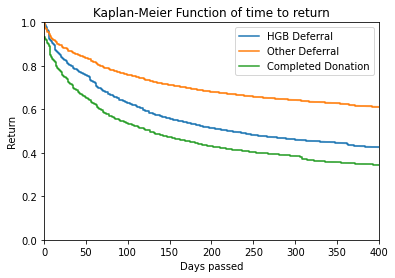

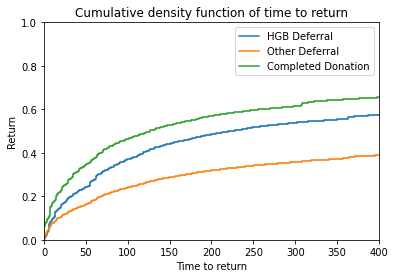

In [31]:
#fiiting the curves
kmf_hgb.fit(durations =  hgb_def["time_to_return"],event_observed = hgb_def["CENSORED"] ,label="HGB Deferral")
kmf_other.fit(durations =  other_def["time_to_return"],event_observed = other_def["CENSORED"], label="Other Deferral")
kmf_comp.fit(durations =  comp_don["time_to_return"],event_observed = comp_don["CENSORED"], label="Completed Donation")

#plot survival function data
kmf_hgb.plot()
kmf_other.plot()
kmf_comp.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Kaplan-Meier Function of time to return")

#plot cumulative density functions
plt.figure()
kmf_hgb.plot_cumulative_density()
kmf_other.plot_cumulative_density()
kmf_comp.plot_cumulative_density()
plt.axis([0, 400, 0, 1])
plt.ylabel("Return")
plt.xlabel("Time to return")
plt.title("Cumulative density function of time to return")

In [32]:
# split by first time and repeat

#create fitter objects for the 3 types for first
kmf_hgb_first= KaplanMeierFitter()
kmf_other_first=KaplanMeierFitter()
kmf_comp_first=KaplanMeierFitter()

#create fitter objects for the 3 types for repeat
kmf_hgb_repeat= KaplanMeierFitter()
kmf_other_repeat=KaplanMeierFitter()
kmf_comp_repeat=KaplanMeierFitter()

#didvide data into first and repeat
first = df.query("first_time == 1")
repeat =df.query("first_time == 0")

#divide data into 3 groups based on deferral type for first
hgb_def_first=first.query("OUTCOME_TYPE == 'low hgb'")
other_def_first=first.query("OUTCOME_TYPE == 'other deferral'")
comp_don_first=first.query("OUTCOME_TYPE == 'completed'")

#divide data into 3 groups based on deferral type for repeat
hgb_def_repeat=repeat.query("OUTCOME_TYPE == 'low hgb'")
other_def_repeat=repeat.query("OUTCOME_TYPE == 'other deferral'")
comp_don_repeat=repeat.query("OUTCOME_TYPE == 'completed'")
 
 # for first time donors
#fiiting the curves
kmf_hgb_first.fit(durations =  hgb_def_first["time_to_return"],event_observed = hgb_def_first["CENSORED"] ,label="HGB Deferral")
kmf_other_first.fit(durations =  other_def_first["time_to_return"],event_observed = other_def_first["CENSORED"], label="Other Deferral")
kmf_comp_first.fit(durations =  comp_don_first["time_to_return"],event_observed = comp_don_first["CENSORED"], label="Completed Donation")


#for repeat donors
#fiiting the curves
kmf_hgb_repeat.fit(durations =  hgb_def_repeat["time_to_return"],event_observed = hgb_def_repeat["CENSORED"] ,label="HGB Deferral")
kmf_other_repeat.fit(durations =  other_def_repeat["time_to_return"],event_observed = other_def_repeat["CENSORED"], label="Other Deferral")
kmf_comp_repeat.fit(durations =  comp_don_repeat["time_to_return"],event_observed = comp_don_repeat["CENSORED"], label="Completed Donation")



<lifelines.KaplanMeierFitter:"Completed Donation", fitted with 3.75482e+06 total observations, 928108 right-censored observations>

In [33]:
# KM fixed, mobile - for the 3 categories

#Kaplen Meier return after donation at fixed site and after donation at mobile site

#creating fitter objects

#for fixed
kmf_hgb_f= KaplanMeierFitter()
kmf_other_f=KaplanMeierFitter()
kmf_comp_f=KaplanMeierFitter()

#for mobile
kmf_hgb_m= KaplanMeierFitter()
kmf_other_m=KaplanMeierFitter()
kmf_comp_m=KaplanMeierFitter()

#divide data respectively

fixed= df.query("Fixed_mobile== 1")
mobile= df.query("Fixed_mobile == 0")

hgb_def_f=fixed.query("OUTCOME_TYPE == 'low hgb'")
other_def_f=fixed.query("OUTCOME_TYPE == 'other deferral'")
comp_don_f=fixed.query("OUTCOME_TYPE == 'completed'")

hgb_def_m=mobile.query("OUTCOME_TYPE == 'low hgb'")
other_def_m=mobile.query("OUTCOME_TYPE == 'other deferral'")
comp_don_m=mobile.query("OUTCOME_TYPE == 'completed'")

In [34]:
from lifelines.utils import median_survival_times

#fit the curves for fixed
kmf_hgb_f.fit(durations =  hgb_def_f["time_to_return"],event_observed = hgb_def_f["CENSORED"] ,label="HGB Deferral")
kmf_other_f.fit(durations =  other_def_f["time_to_return"],event_observed = other_def_f["CENSORED"], label="Other Deferral")
kmf_comp_f.fit(durations =  comp_don_f["time_to_return"],event_observed = comp_don_f["CENSORED"], label="Completed Donation")

#fit curves for mobile
kmf_hgb_m.fit(durations =  hgb_def_m["time_to_return"],event_observed = hgb_def_m["CENSORED"] ,label="HGB Deferral")
kmf_other_m.fit(durations =  other_def_m["time_to_return"],event_observed = other_def_m["CENSORED"], label="Other Deferral")
kmf_comp_m.fit(durations =  comp_don_m["time_to_return"],event_observed = comp_don_m["CENSORED"], label="Completed Donation")



<lifelines.KaplanMeierFitter:"Completed Donation", fitted with 2.56692e+06 total observations, 1.00411e+06 right-censored observations>

Text(0.5, 1.0, 'Kaplan-Meier Function of time to return-Mobile')

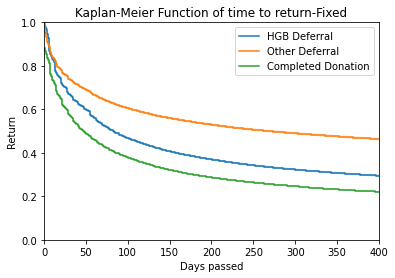

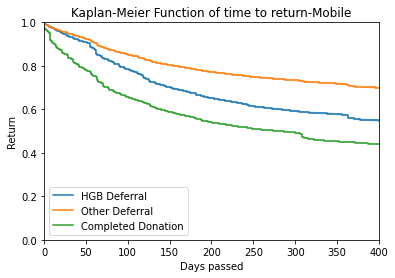

In [35]:
#plot survival function data -fixed
kmf_hgb_f.plot()
kmf_other_f.plot()
kmf_comp_f.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Kaplan-Meier Function of time to return-Fixed")
#plot survival function data -mobile
plt.figure()
kmf_hgb_m.plot()
kmf_other_m.plot()
kmf_comp_m.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Kaplan-Meier Function of time to return-Mobile")

In [36]:
# split by first time and repeat 
#first time
#for fixed 
kmf_hgb_f_first= KaplanMeierFitter()
kmf_other_f_first=KaplanMeierFitter()
kmf_comp_f_first=KaplanMeierFitter()

#for mobile
kmf_hgb_m_first= KaplanMeierFitter()
kmf_other_m_first=KaplanMeierFitter()
kmf_comp_m_first=KaplanMeierFitter()

#divide data respectively
fixed_first= first.query("Fixed_mobile== 1")
mobile_first= first.query("Fixed_mobile == 0")

hgb_def_f_first=fixed_first.query("OUTCOME_TYPE == 'low hgb'")
other_def_f_first=fixed_first.query("OUTCOME_TYPE == 'other deferral'")
comp_don_f_first=fixed_first.query("OUTCOME_TYPE == 'completed'")

hgb_def_m_first=mobile_first.query("OUTCOME_TYPE == 'low hgb'")
other_def_m_first=mobile_first.query("OUTCOME_TYPE == 'other deferral'")
comp_don_m_first=mobile_first.query("OUTCOME_TYPE == 'completed'")

#fit the curves for fixed
kmf_hgb_f_first.fit(durations =  hgb_def_f_first["time_to_return"],event_observed = hgb_def_f_first["CENSORED"] ,label="HGB Deferral")
kmf_other_f_first.fit(durations =  other_def_f_first["time_to_return"],event_observed = other_def_f_first["CENSORED"], label="Other Deferral")
kmf_comp_f_first.fit(durations =  comp_don_f_first["time_to_return"],event_observed = comp_don_f_first["CENSORED"], label="Completed Donation")

#fit curves for mobile
kmf_hgb_m_first.fit(durations =  hgb_def_m_first["time_to_return"],event_observed = hgb_def_m_first["CENSORED"] ,label="HGB Deferral")
kmf_other_m_first.fit(durations =  other_def_m_first["time_to_return"],event_observed = other_def_m_first["CENSORED"], label="Other Deferral")
kmf_comp_m_first.fit(durations =  comp_don_m_first["time_to_return"],event_observed = comp_don_m_first["CENSORED"], label="Completed Donation")



<lifelines.KaplanMeierFitter:"Completed Donation", fitted with 642749 total observations, 407786 right-censored observations>

In [37]:
#repeat
#for fixed 
kmf_hgb_f_r= KaplanMeierFitter()
kmf_other_f_r=KaplanMeierFitter()
kmf_comp_f_r=KaplanMeierFitter()

#for mobile
kmf_hgb_m_r= KaplanMeierFitter()
kmf_other_m_r=KaplanMeierFitter()
kmf_comp_m_r=KaplanMeierFitter()

#divide data respectively
fixed_r= repeat.query("Fixed_mobile== 1")
mobile_r= repeat.query("Fixed_mobile == 0")

hgb_def_f_r=fixed_r.query("OUTCOME_TYPE == 'low hgb'")
other_def_f_r=fixed_r.query("OUTCOME_TYPE == 'other deferral'")
comp_don_f_r=fixed_r.query("OUTCOME_TYPE == 'completed'")

hgb_def_m_r=mobile_r.query("OUTCOME_TYPE == 'low hgb'")
other_def_m_r=mobile_r.query("OUTCOME_TYPE == 'other deferral'")
comp_don_m_r=mobile_r.query("OUTCOME_TYPE == 'completed'")

#fit the curves for fixed
kmf_hgb_f_r.fit(durations =  hgb_def_f_r["time_to_return"],event_observed = hgb_def_f_r["CENSORED"] ,label="HGB Deferral")
kmf_other_f_r.fit(durations =  other_def_f_r["time_to_return"],event_observed = other_def_f_r["CENSORED"], label="Other Deferral")
kmf_comp_f_r.fit(durations =  comp_don_f_r["time_to_return"],event_observed = comp_don_f_r["CENSORED"], label="Completed Donation")

#fit curves for mobile
kmf_hgb_m_r.fit(durations =  hgb_def_m_r["time_to_return"],event_observed = hgb_def_m_r["CENSORED"] ,label="HGB Deferral")
kmf_other_m_r.fit(durations =  other_def_m_r["time_to_return"],event_observed = other_def_m_r["CENSORED"], label="Other Deferral")
kmf_comp_m_r.fit(durations =  comp_don_m_r["time_to_return"],event_observed = comp_don_m_r["CENSORED"], label="Completed Donation")



<lifelines.KaplanMeierFitter:"Completed Donation", fitted with 1.92417e+06 total observations, 596327 right-censored observations>

In [38]:
#CIF on fixed-mobile pattern #event of inteterst is return to fixed

#donors who donated at fixed

f_hgb= hgb_def_repeat.query("Fixed_mobile == 1")
m_hgb= hgb_def_repeat.query("Fixed_mobile == 0")

f_comp=comp_don_repeat.query("Fixed_mobile == 1")
m_comp=comp_don_repeat.query("Fixed_mobile == 0")


kmfhgb_ff= AalenJohansenFitter(calculate_variance=False, jitter_level= 0.0001)
kmfhgb_fm= AalenJohansenFitter(calculate_variance=False, jitter_level= 0.0001)
kmfhgb_mf= AalenJohansenFitter(calculate_variance=False, jitter_level= 0.0001)
kmfhgb_mm= AalenJohansenFitter(calculate_variance=False, jitter_level= 0.0001)

kmfcomp_ff=AalenJohansenFitter(calculate_variance=False, jitter_level= 0.0001)
kmfcomp_fm= AalenJohansenFitter(calculate_variance=False, jitter_level= 0.0001)
kmfcomp_mf= AalenJohansenFitter(calculate_variance=False, jitter_level= 0.0001)
kmfcomp_mm= AalenJohansenFitter(calculate_variance=False, jitter_level= 0.0001)

kmfhgb_ff.fit(durations =  f_hgb["time_to_return"], event_observed = f_hgb['competing_events'], event_of_interest=1, label="Fixed then Fixed")
kmfhgb_fm.fit(durations =  f_hgb["time_to_return"],event_observed = f_hgb['competing_events'], event_of_interest=2, label="Fixed then Mobile")
kmfhgb_mf.fit(durations =  m_hgb["time_to_return"],event_observed = m_hgb['competing_events'] ,event_of_interest=1,label="Mobile then Fixed")
kmfhgb_mm.fit(durations =  m_hgb["time_to_return"],event_observed = m_hgb['competing_events'] ,event_of_interest=2,label="Mobile then Mobile")


kmfcomp_ff.fit(durations =  f_comp["time_to_return"],event_observed = f_comp['competing_events'], event_of_interest=1,label="Fixed then Fixed")
kmfcomp_fm.fit(durations =  f_comp["time_to_return"],event_observed = f_comp['competing_events'], event_of_interest=2,label="Fixed then Mobile")
kmfcomp_mf.fit(durations =  m_comp["time_to_return"],event_observed = m_comp['competing_events'] ,event_of_interest=1,label="Mobile then Fixed")
kmfcomp_mm.fit(durations =  m_comp["time_to_return"],event_observed = m_comp['competing_events'] ,event_of_interest=2,label="Mobile then Mobile")


/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/aalen_johansen_fitter.py:111: Warning: Tied event times were detected. The Aalen-Johansen estimator cannot handle tied event times.
                To resolve ties, data is randomly jittered.
  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/aalen_johansen_fitter.py:111: Warning: Tied event times were detected. The Aalen-Johansen estimator cannot handle tied event times.
                To resolve ties, data is randomly jittered.
  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/aalen_johansen_fitter.py:111: Warning: Tied event times were detected. The Aalen-Johansen estimator cannot handle tied event times.
                To resolve ties, data is randomly jittered.
  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/aalen_johansen_fitter.py:111: Warning: Tied event times were detected. The Aalen-Johansen estimator canno

<lifelines.AalenJohansenFitter>

In [50]:
# CIF on fixed-mobile pattern #first time donors
#donors who donated at mobile
# CIF on fixed-mobile pattern #first time donors
#donors who donated at mobile

f_hgb_first= hgb_def_first.query("Fixed_mobile == 1")
m_hgb_first= hgb_def_first.query("Fixed_mobile == 0")

f_comp_first=comp_don_first.query("Fixed_mobile == 1")
m_comp_first=comp_don_first.query("Fixed_mobile == 0")


kmfhgb_ff_first= AalenJohansenFitter(calculate_variance=True, jitter_level= 0.0001)
kmfhgb_fm_first=AalenJohansenFitter(calculate_variance=True, jitter_level= 0.0001)
kmfhgb_mf_first= AalenJohansenFitter(calculate_variance=True, jitter_level= 0.0001)
kmfhgb_mm_first= AalenJohansenFitter(calculate_variance=True, jitter_level= 0.0001)

kmfcomp_ff_first= AalenJohansenFitter(calculate_variance=False, jitter_level= 0.0001)
kmfcomp_fm_first= AalenJohansenFitter(calculate_variance=False, jitter_level= 0.0001)
kmfcomp_mf_first= AalenJohansenFitter(calculate_variance=False, jitter_level= 0.0001)
kmfcomp_mm_first= AalenJohansenFitter(calculate_variance=False, jitter_level= 0.0001)


kmfhgb_ff_first.fit(durations =  f_hgb_first["time_to_return"],event_observed = f_hgb_first['competing_events'] ,event_of_interest=1,  label="Fixed then Fixed")
kmfhgb_fm_first.fit(durations =  f_hgb_first["time_to_return"],event_observed = f_hgb_first['competing_events'], event_of_interest=2, label="Fixed then Mobile")
kmfhgb_mf_first.fit(durations =  m_hgb_first["time_to_return"],event_observed = m_hgb_first['competing_events'] ,event_of_interest=1, label="Mobile then Fixed")
kmfhgb_mm_first.fit(durations =  m_hgb_first["time_to_return"],event_observed = m_hgb_first['competing_events'] ,event_of_interest=2, label="Mobile then Mobile")


kmfcomp_ff_first.fit(durations =  f_comp_first["time_to_return"],event_observed = f_comp_first['competing_events'] ,event_of_interest=1, label="Fixed then Fixed")
kmfcomp_fm_first.fit(durations =  f_comp_first["time_to_return"],event_observed = f_comp_first['competing_events'], event_of_interest=2, label="Fixed then Mobile")
kmfcomp_mf_first.fit(durations =  m_comp_first["time_to_return"],event_observed = m_comp_first['competing_events'] ,event_of_interest=1, label="Mobile then Fixed")
kmfcomp_mm_first.fit(durations =  m_comp_first["time_to_return"],event_observed = m_comp_first['competing_events'] ,event_of_interest=2, label="Mobile then Mobile")


/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/aalen_johansen_fitter.py:111: Warning: Tied event times were detected. The Aalen-Johansen estimator cannot handle tied event times.
                To resolve ties, data is randomly jittered.
  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/aalen_johansen_fitter.py:111: Warning: Tied event times were detected. The Aalen-Johansen estimator cannot handle tied event times.
                To resolve ties, data is randomly jittered.
  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/aalen_johansen_fitter.py:111: Warning: Tied event times were detected. The Aalen-Johansen estimator cannot handle tied event times.
                To resolve ties, data is randomly jittered.
  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/aalen_johansen_fitter.py:111: Warning: Tied event times were detected. The Aalen-Johansen estimator canno

<lifelines.AalenJohansenFitter>

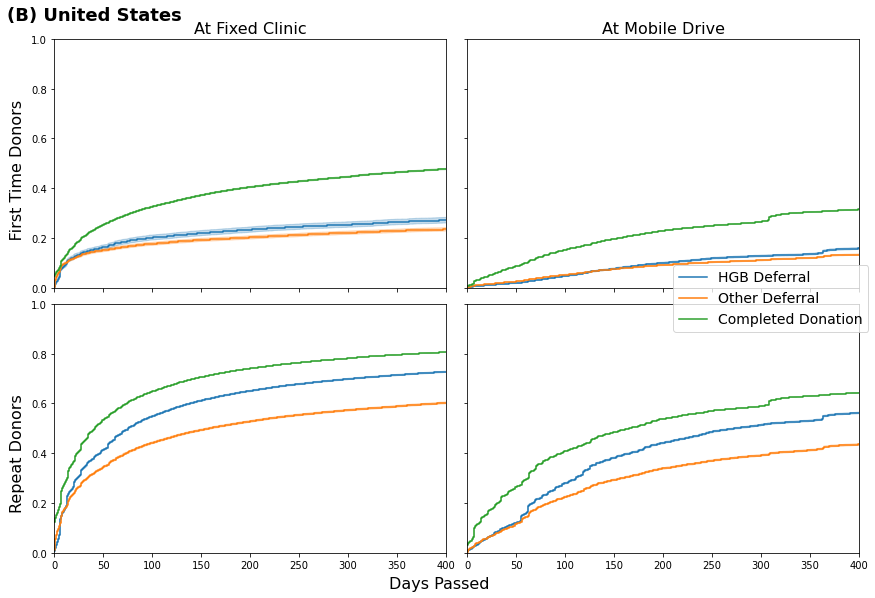

In [51]:

# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8),  layout='constrained', sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = axes.flatten()
plt.axis([0, 400, 0, 1])
fig.suptitle('(B) United States', fontsize=18,fontweight='bold',  x=0, y=1.02, horizontalalignment='left', verticalalignment='top')
         
#kmf_hgb_first.plot(ax=ax1, legend=False)
#kmf_other_first.plot(ax=ax1, legend=False)
#kmf_comp_first.plot(ax=ax1, legend=False)

#ax1.set_title('At Both Fixed and Mobile', fontsize=16)

kmf_hgb_f_first.plot_cumulative_density(ax=ax1, legend=False)
kmf_other_f_first.plot_cumulative_density(ax=ax1, legend=False)
kmf_comp_f_first.plot_cumulative_density(ax=ax1, legend=False)
ax1.set_title('At Fixed Clinic', fontsize=16)

kmf_hgb_m_first.plot_cumulative_density(ax=ax2, legend=False)
kmf_other_m_first.plot_cumulative_density(ax=ax2, legend=False)
kmf_comp_m_first.plot_cumulative_density(ax=ax2, legend=False)
ax2.set_title('At Mobile Drive', fontsize=16)

#kmf_hgb_repeat.plot(ax=ax4, legend=False)
#kmf_other_repeat.plot(ax=ax4, legend=False)
#kmf_comp_repeat.plot(ax=ax4, legend=False)

kmf_hgb_f_r.plot_cumulative_density(ax=ax3, legend=False)
kmf_other_f_r.plot_cumulative_density(ax=ax3, legend=False)
kmf_comp_f_r.plot_cumulative_density(ax=ax3, legend=False)

kmf_hgb_m_r.plot_cumulative_density(ax=ax4, legend=False)
kmf_other_m_r.plot_cumulative_density(ax=ax4, legend=False)
kmf_comp_m_r.plot_cumulative_density(ax=ax4, legend=False)

# Define the legend handles and labels from one of the subplots
legend_handles, legend_labels = axes[0, 0].get_legend_handles_labels()

# Create a single legend outside the subplots
fig.legend(legend_handles, legend_labels, loc='center right', fontsize=14)

# Remove individual subplot labels
for ax in axes.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')



fig.supxlabel('Days Passed', fontsize=16)
fig.supylabel('Repeat Donors                              First Time Donors', fontsize=16)

plt.savefig("../4_figures/US_KM.png", facecolor='white', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

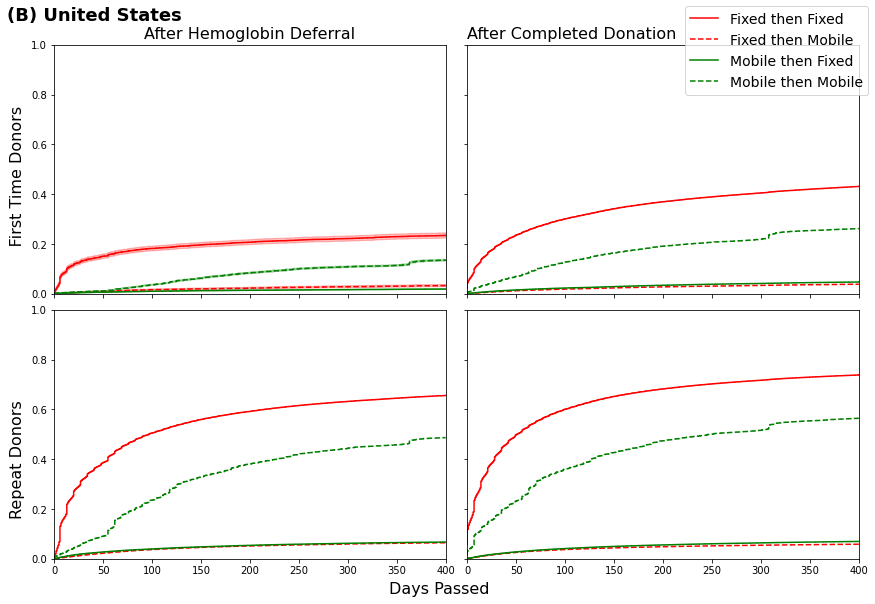

In [53]:
# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8), layout='constrained', sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = axes.flatten()
plt.axis([0, 400, 0, 1])
fig.suptitle('(B) United States', fontsize=18,fontweight='bold',  x=0, y=1.03, horizontalalignment='left', verticalalignment='top')

kmfhgb_ff_first.plot(ax=ax1, legend=False, color='red')
kmfhgb_fm_first.plot(ax=ax1, legend=False, color='red', linestyle = 'dashed')
kmfhgb_mf_first.plot(ax=ax1, legend=False, color='green')
kmfhgb_mm_first.plot(ax=ax1, legend=False, color='green', linestyle = 'dashed')
#kmfhgb_last_first.plot(ax=ax1)
ax1.set_title('After Hemoglobin Deferral', fontsize=16)

kmfcomp_ff_first.plot(ci_show=False,ax=ax2, legend=False, color='red')
kmfcomp_fm_first.plot(ci_show=False,ax=ax2, legend=False, color='red', linestyle = 'dashed')
kmfcomp_mf_first.plot(ci_show=False,ax=ax2, legend=False, color='green')
kmfcomp_mm_first.plot(ci_show=False,ax=ax2, legend=False, color='green', linestyle = 'dashed')
#kmfcomp_last_first.plot(ax=ax1)
ax2.set_title('After Completed Donation', fontsize=16, loc='left')

kmfhgb_ff.plot(ci_show=False,ax=ax3, legend=False, color='red')
kmfhgb_fm.plot(ci_show=False,ax=ax3, legend=False, color='red', linestyle = 'dashed')
kmfhgb_mf.plot(ci_show=False,ax=ax3, legend=False, color='green')
kmfhgb_mm.plot(ci_show=False,ax=ax3, legend=False, color='green', linestyle = 'dashed')
#kmfhgb_last.plot()


kmfcomp_ff.plot(ci_show=False,ax=ax4, legend=False, color='red')
kmfcomp_fm.plot(ci_show=False,ax=ax4, legend=False, color='red', linestyle = 'dashed')
kmfcomp_mf.plot(ci_show=False,ax=ax4, legend=False, color='green')
kmfcomp_mm.plot(ci_show=False,ax=ax4, legend=False, color='green', linestyle = 'dashed')
#kmfcomp_last.plot()


# Define the legend handles and labels from one of the subplots
legend_handles, legend_labels = axes[0, 0].get_legend_handles_labels()

# Create a single legend outside the subplots
fig.legend(legend_handles, legend_labels, loc='upper right', fontsize=14)

# Remove individual subplot labels
for ax in axes.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')



fig.supxlabel('Days Passed', fontsize=16)
fig.supylabel('Repeat Donors                              First Time Donors', fontsize=16)
plt.savefig("../4_figures/US_CIF.png", facecolor='white', bbox_inches='tight')
plt.show()

In [42]:
#make km table

def make_table(kmf_c, kmf_hgb, kmf_o, kmm_c, kmm_hgb, kmm_o, df_fc, df_fh, df_fo, df_mc, df_mh, df_mo):
    #create a dict
    table={}
    table['Donation Environment-Outcome Type']=['Percentage of donors returning', 'Time in days when 25% had returned', 'Time in days when 50% had returned (median return time)']
    
    #fixed comp
    percentage_returning = kmf_c.cumulative_density_at_times([365])
    time_at_25_percent = kmf_c.percentile(0.75)
    time_at_50_percent= kmf_c.median_survival_time_

    table['Fixed - Completed']=[percentage_returning, time_at_25_percent, time_at_50_percent]
    
    #fixed hgb
    percentage_returning = kmf_hgb.cumulative_density_at_times([365])
    time_at_25_percent = kmf_hgb.percentile(0.75)
    time_at_50_percent = kmf_hgb.median_survival_time_
    
    table['Fixed - Low HGB']=[percentage_returning, time_at_25_percent, time_at_50_percent]
    
    #fixed other
    percentage_returning = kmf_o.cumulative_density_at_times([365])
    time_at_25_percent = kmf_o.percentile(0.75)
    time_at_50_percent = kmf_o.median_survival_time_
    table['Fixed - Other']=[percentage_returning, time_at_25_percent, time_at_50_percent]
    
    #mobile comp
    percentage_returning =kmm_c.cumulative_density_at_times([365])
    time_at_25_percent = kmm_c.percentile(0.75)
    time_at_50_percent = kmm_c.median_survival_time_
    table['Mobile - Completed']=[percentage_returning, time_at_25_percent, time_at_50_percent]
    
    #mobile hgb
    percentage_returning = kmm_hgb.cumulative_density_at_times([365])
    time_at_25_percent= kmm_hgb.percentile(0.75)
    time_at_50_percent= kmm_hgb.median_survival_time_
    table['Mobile - Low HGB']=[percentage_returning, time_at_25_percent, time_at_50_percent]
    
    #mobile other
    percentage_returning = kmm_o.cumulative_density_at_times([365])
    time_at_25_percent= kmm_o.percentile(0.75)
    time_at_50_percent= kmm_o.median_survival_time_
    table['Mobile - Other']=[percentage_returning, time_at_25_percent, time_at_50_percent]
    
    table=pd.DataFrame(table)
    
    return table
    

In [43]:
table=make_table(kmf_comp_f, kmf_hgb_f, kmf_other_f, kmf_comp_m, kmf_hgb_m, kmf_other_m, comp_don_f, hgb_def_f, other_def_f,comp_don_m, hgb_def_m,other_def_m)
print(table.T)



                                                                                   0  \
Donation Environment-Outcome Type                     Percentage of donors returning   
Fixed - Completed                  365    0.771799
Name: Completed Donation, dtyp...   
Fixed - Low HGB                    365    0.69695
Name: HGB Deferral, dtype: float64   
Fixed - Other                      365    0.528829
Name: Other Deferral, dtype: f...   
Mobile - Completed                 365    0.551282
Name: Completed Donation, dtyp...   
Mobile - Low HGB                   365    0.44025
Name: HGB Deferral, dtype: float64   
Mobile - Other                     365    0.292446
Name: Other Deferral, dtype: f...   

                                                                    1  \
Donation Environment-Outcome Type  Time in days when 25% had returned   
Fixed - Completed                                                 9.0   
Fixed - Low HGB                                                  18.0   
Fix

/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/__init__.py:271: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/__init__.py:271: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/__init__.py:271: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/__init__.py:271: ApproximationWarning: Approximating using `survival_function_`. 

In [44]:
# first time 
table=make_table(kmf_comp_f_first, kmf_hgb_f_first, kmf_other_f_first, kmf_comp_m_first, kmf_hgb_m_first, kmf_other_m_first, comp_don_f_first, hgb_def_f_first, other_def_f_first,comp_don_m_first, hgb_def_m_first, other_def_m_first)
print(table.T)

                                                                                   0  \
Donation Environment-Outcome Type                     Percentage of donors returning   
Fixed - Completed                  365    0.467999
Name: Completed Donation, dtyp...   
Fixed - Low HGB                    365    0.26654
Name: HGB Deferral, dtype: float64   
Fixed - Other                      365    0.23122
Name: Other Deferral, dtype: fl...   
Mobile - Completed                 365    0.307402
Name: Completed Donation, dtyp...   
Mobile - Low HGB                   365    0.149084
Name: HGB Deferral, dtype: flo...   
Mobile - Other                     365    0.127286
Name: Other Deferral, dtype: f...   

                                                                    1  \
Donation Environment-Outcome Type  Time in days when 25% had returned   
Fixed - Completed                                                49.0   
Fixed - Low HGB                                                 278.0   
Fix

/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/__init__.py:271: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/__init__.py:271: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/__init__.py:271: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/__init__.py:271: ApproximationWarning: Approximating using `survival_function_`. 

In [45]:
#repeat
table=make_table(kmf_comp_f_r, kmf_hgb_f_r, kmf_other_f_r, kmf_comp_m_r, kmf_hgb_m_r, kmf_other_m_r, comp_don_f_r, hgb_def_f_r, other_def_f_r,comp_don_m_r, hgb_def_m_r, other_def_m_r)
print(table.T)

                                                                                   0  \
Donation Environment-Outcome Type                     Percentage of donors returning   
Fixed - Completed                  365    0.798774
Name: Completed Donation, dtyp...   
Fixed - Low HGB                    365    0.71838
Name: HGB Deferral, dtype: float64   
Fixed - Other                      365    0.593244
Name: Other Deferral, dtype: f...   
Mobile - Completed                 365    0.63367
Name: Completed Donation, dtype...   
Mobile - Low HGB                   365    0.549699
Name: HGB Deferral, dtype: flo...   
Mobile - Other                     365    0.425689
Name: Other Deferral, dtype: f...   

                                                                    1  \
Donation Environment-Outcome Type  Time in days when 25% had returned   
Fixed - Completed                                                 8.0   
Fixed - Low HGB                                                  17.0   
Fix

/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/__init__.py:271: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/__init__.py:271: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/__init__.py:271: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
/home/huzbah/.local/lib/python3.10/site-packages/lifelines/fitters/__init__.py:271: ApproximationWarning: Approximating using `survival_function_`. 

# 